## Prompts for locations

In [11]:
location_prompts = [
    "steampunk city with skyscrapers",
    "cyberpunk village in Japanese rustic style",
    "fantasy dungeons and dragons",
    "noir city from 1930s",
    "StarTrek inspired spaceship",
    "undeground mine of goblins",
    "SuperMario style magic land plain",
    "SuperMario style magic land beach",
]

## Generating locations 

In [12]:
from holodeck import initialize_location
from holodeck import generate_location_and_encounters
import os
from tqdm.notebook import tqdm
import traceback

import concurrent.futures
from tqdm import tqdm

def generate_location(prompt):
    location_dict, encounters_list = generate_location_and_encounters(prompt)
    if location_dict:
        try:
            location = initialize_location(location_dict, encounters_list)
            return location
        except Exception as e:
            print("Error: ", e)
            traceback.print_exc()
    else:
        print(f"GENERATING FROM '{prompt}' failed!")
        return None

locations = []
with concurrent.futures.ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    results = list(tqdm(executor.map(generate_location, location_prompts), total=len(location_prompts), desc="Generating locations"))
    locations += [r for r in results if r is not None]



locations

Generating locations:   0%|          | 0/8 [00:00<?, ?it/s]

<
{'name': 'Goblin Mine', 'description': 'A massive hole in the ground surrounded by steep cliffs. The entrance is covered by a large wooden door, guarded by goblins. The air is filled with the sound of obsidian tools and chants.\n', 'buildings': [{'name': 'Large wooden door', 'description': 'A tall wooden door, kept closed by a thick iron chain.', 'enterable': True}, {'name': 'Cliffs', 'description': 'Steep cliffs that surround the mine. Too high to climb.'}], 'ways': [{'name': 'Entrance', 'description': 'The entrance to the Goblin Mine.'}]}

<
{'name': "Mario's Magic Beach", 'description': 'A beach of shimmering white sand and sparkling blue water. Waves gently lap against the shore, seagulls carry out their songs in the air, and the bright sun casts down its light from the sky. Just off the beach lies a small town of colorful houses with a cheerful windmill at its center. \n', 'buildings': [{'name': 'Cheerful windmill', 'description': 'A happy yellow windmill that stands near the ce

Generating locations:  12%|█▎        | 1/8 [00:09<01:08,  9.76s/it]

<
[{'probability': 0.1, 'description': 'Walking down the Main Street, you spot a strange mechanical bird roosting on a rooftop', 'actions': [{'type': 'critter', 'name': 'Mechanical Bird', 'description': 'A strange mechanical bird with gleaming gears and blinking lights'}], 'trigger': {'type': 'way', 'way': 'Main Street'}}, {'probability': 0.04, 'description': 'You hear a loud beeping coming from inside the clock-tower', 'actions': [{'type': 'building', 'name': 'Clockwork Machine', 'description': 'A large clockwork machine with spinning gears and whirring pistons'}], 'trigger': {'type': 'building', 'building': 'Clock-tower'}}, {'probability': 0.05, 'description': 'You find an old chest at the edge of the old pier', 'actions': [{'type': 'item', 'name': 'Old Chest', 'description': 'An old, rusty chest full of surprises'}]}]

<
[{'probability': 0.2, 'description': 'As you venture across the magic plains, you find a key embedded in the grass', 'actions': [{'type': 'item', 'description': 'Ol

Traceback (most recent call last):
  File "/tmp/ipykernel_8239/2627030779.py", line 14, in generate_location
    location = initialize_location(location_dict, encounters_list)
  File "/home/standard/Holodeck/holodeck/game_objects.py", line 172, in initialize_location
    way = Way(way_dict['name'], way_dict.get('description', ""))
KeyError: 'name'
Generating locations: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]

<
[{'probability': 0.1, 'description': 'You stumble across a forgotten temple nestled between the winding roads.', 'actions': [{'type': 'building', 'name': 'Forgotten temple', 'description': 'An ancient temple, coated in moss and vines.'}], 'trigger': {'type': 'location'}}, {'probability': 0.2, 'description': 'As you approach the pagoda, you hear the sound of a small group of musicians playing.', 'actions': [{'type': 'character', 'name': 'Musicians', 'description': 'A group of musicians playing a traditional tune.'}], 'trigger': {'type': 'building', 'building': 'Old pagoda'}}, {'probability': 0.2, 'description': 'A strange creature emerges from the shadows of the alleyways, its eyes glowing neon.', 'actions': [{'type': 'critter', 'name': 'Neon-eyed creature', 'description': 'A mysterious creature with neon eyes, it seems to be made of pure energy.'}], 'trigger': {}}]



## Generate Image Prompts

In [13]:
from holodeck.gpt_text import \
        generate_object_image_prompt, \
        generate_building_image_prompt, \
        generate_location_image_prompt

from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

locations_prompts = []
objects_image_prompts = []
buildings_image_prompts = []

def generate_location_images(location):
    return (location, generate_location_image_prompt(location))

def generate_object_images(location):
    prompts = []
    for o in location.objects:
        prompts.append((o, generate_object_image_prompt(o, location)))
    return prompts

def generate_building_images(location):
    prompts = []
    for b in location.all_buildings:
        prompts.append((b, generate_building_image_prompt(b, location)))
    return prompts

with ThreadPoolExecutor() as executor:
    location_image_futures = list(tqdm(executor.map(generate_location_images, locations), desc="Locations"))
    object_image_futures = [executor.submit(generate_object_images, location) for location in locations]
    building_image_futures = [executor.submit(generate_building_images, location) for location in locations]

    for location, prompt in location_image_futures:
        locations_prompts.append((location, prompt))
    for f in object_image_futures:
        for prompt in f.result():
            objects_image_prompts.append(prompt)
    for f in building_image_futures:
        for prompt in f.result():
            buildings_image_prompts.append(prompt)




Locations: 7it [00:01,  5.08it/s]


## Generate Images

Images:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

### Steampunk City


An aerial photograph of an industrial cityscape with an old dock, clock-tower and other buildings during sunset with an ultra-wide lens — at 16:9. vinkpunk

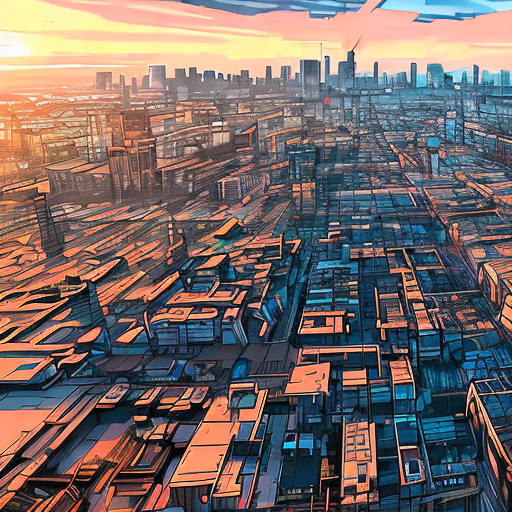

Images:  11%|█         | 1/9 [00:03<00:24,  3.08s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Keicho Cyberpunk Village


An aerial photograph of a rustic village nestled in the hills of Japan with the old pagoda, neon signs, and roads winding through the alleyways during the night with a wide-angle lens — at 16:9. vinkpunk

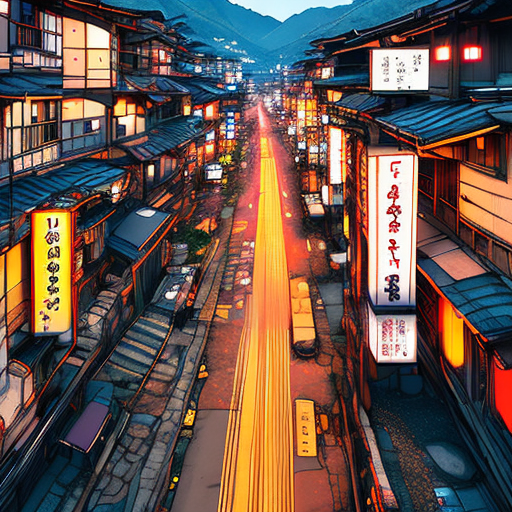

Images:  22%|██▏       | 2/9 [00:06<00:21,  3.05s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Noir City of 1930s

An aerial photograph of a cityscape with City Hall and Factory during twilight with a medium-angle lens — at 16:9. vinkpunk

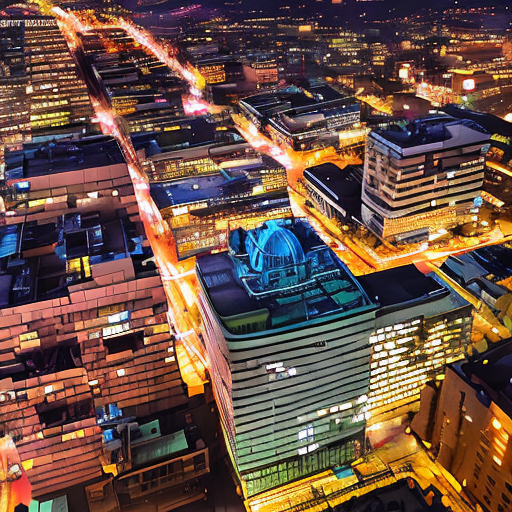

Images:  33%|███▎      | 3/9 [00:09<00:18,  3.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### USS Enterprise


An aerial photograph of a massive, metallic structure in space with a race track, arena, and navigation tower during sunset with a fisheye lens — at 16:9. vinkpunk

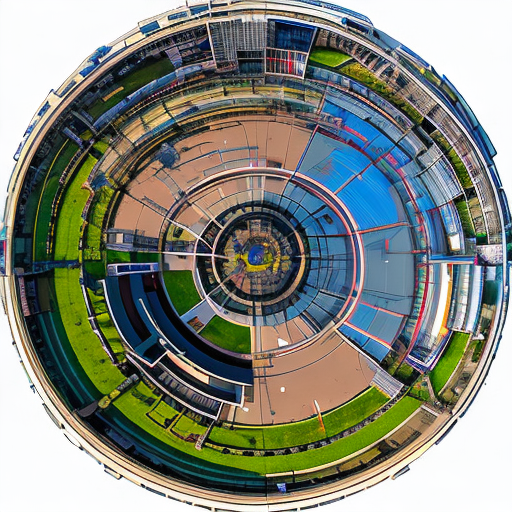

Images:  44%|████▍     | 4/9 [00:12<00:15,  3.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Goblin Mine


An aerial photograph of a cave entrance and cliffs surrounded by a vast expanse of wild grassland during sunrise with a fisheye lens — at 16:9. vinkpunk

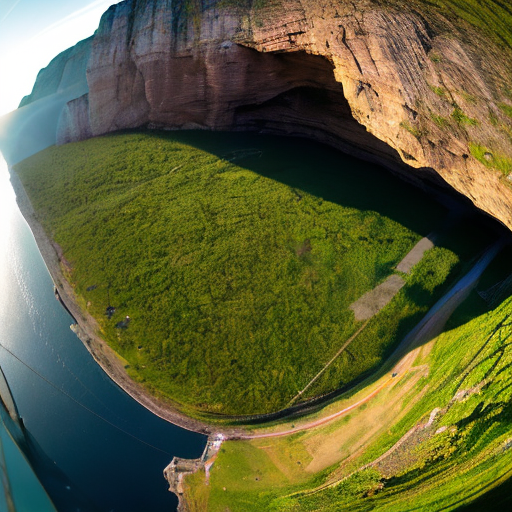

Images:  56%|█████▌    | 5/9 [00:15<00:12,  3.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Magic Plains of Little Bottom


An aerial photograph of a grassy field with a Weeping Tree and Enchanted Castle during sunrise with a fisheye lens — at 16:9. vinkpunk

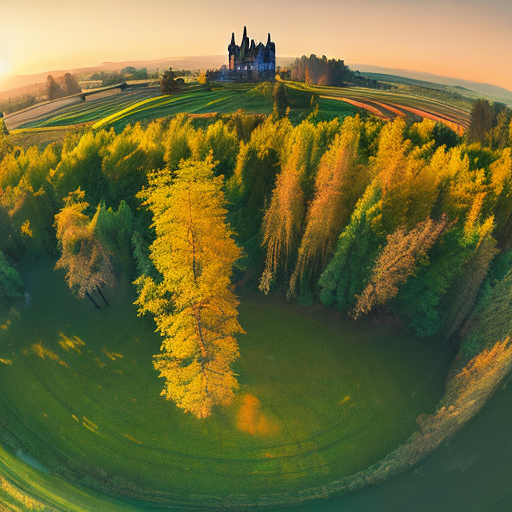

Images:  67%|██████▋   | 6/9 [00:18<00:09,  3.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Mario's Magic Beach


An aerial photograph of a beach and town with a cheerful windmill and colourful houses during day with natural sunlight using a telephoto lens — at 16:9. vinkpunk

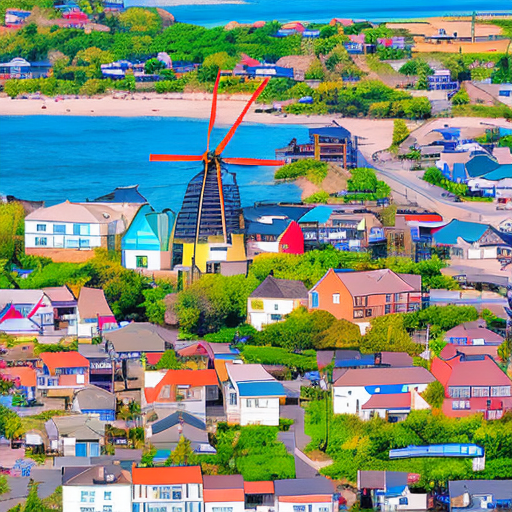

Images:  78%|███████▊  | 7/9 [00:21<00:06,  3.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Mechanical Bird


The entire Mechanical Bird is visible. A strange mechanical bird with gleaming gears, blinking lights, and other intricate details on background of an array of airships and clockwork-like skyscrapers during night time with neon-glow lighting. vinkpunk

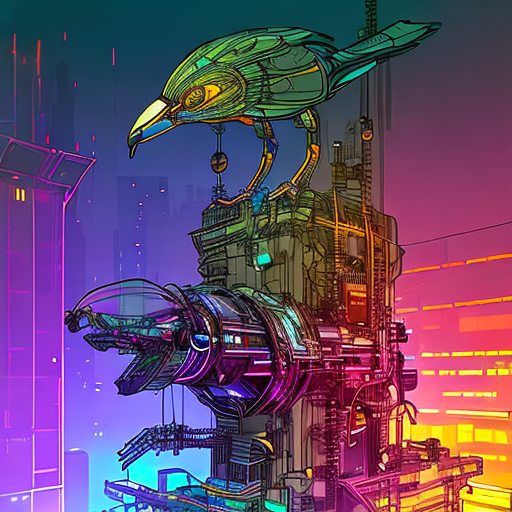

Images:  89%|████████▉ | 8/9 [00:24<00:03,  3.05s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Musicians


The entire group of musicians is visible. Musicians playing a traditional tune with various instruments, colorful costumes and bright smiles on a background of a bustling village square near a pagoda during the night with neon lighting. vinkpunk

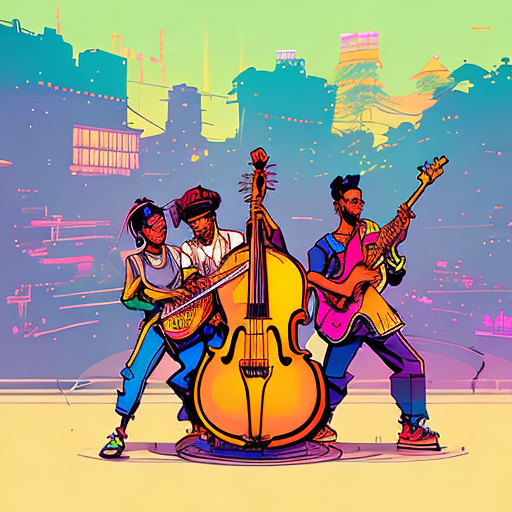

Images: 100%|██████████| 9/9 [00:27<00:00,  3.05s/it]


9

In [14]:
from holodeck.gpt_image import generate_image
from IPython.display import display, Markdown

img_prompts = locations_prompts + objects_image_prompts + buildings_image_prompts

img_prompts = img_prompts[:9]

images = []

for obj, prompt in tqdm(img_prompts, desc="Images"):
    image = generate_image(prompt)
    display(Markdown(f"### {obj.name}"))
    display(Markdown(prompt))
    display(image)
    image_file_name = f".images/{obj.name}.jpg"
    image.save(image_file_name)
    images.append((obj, prompt, image_file_name))

len(images)


## Display Images

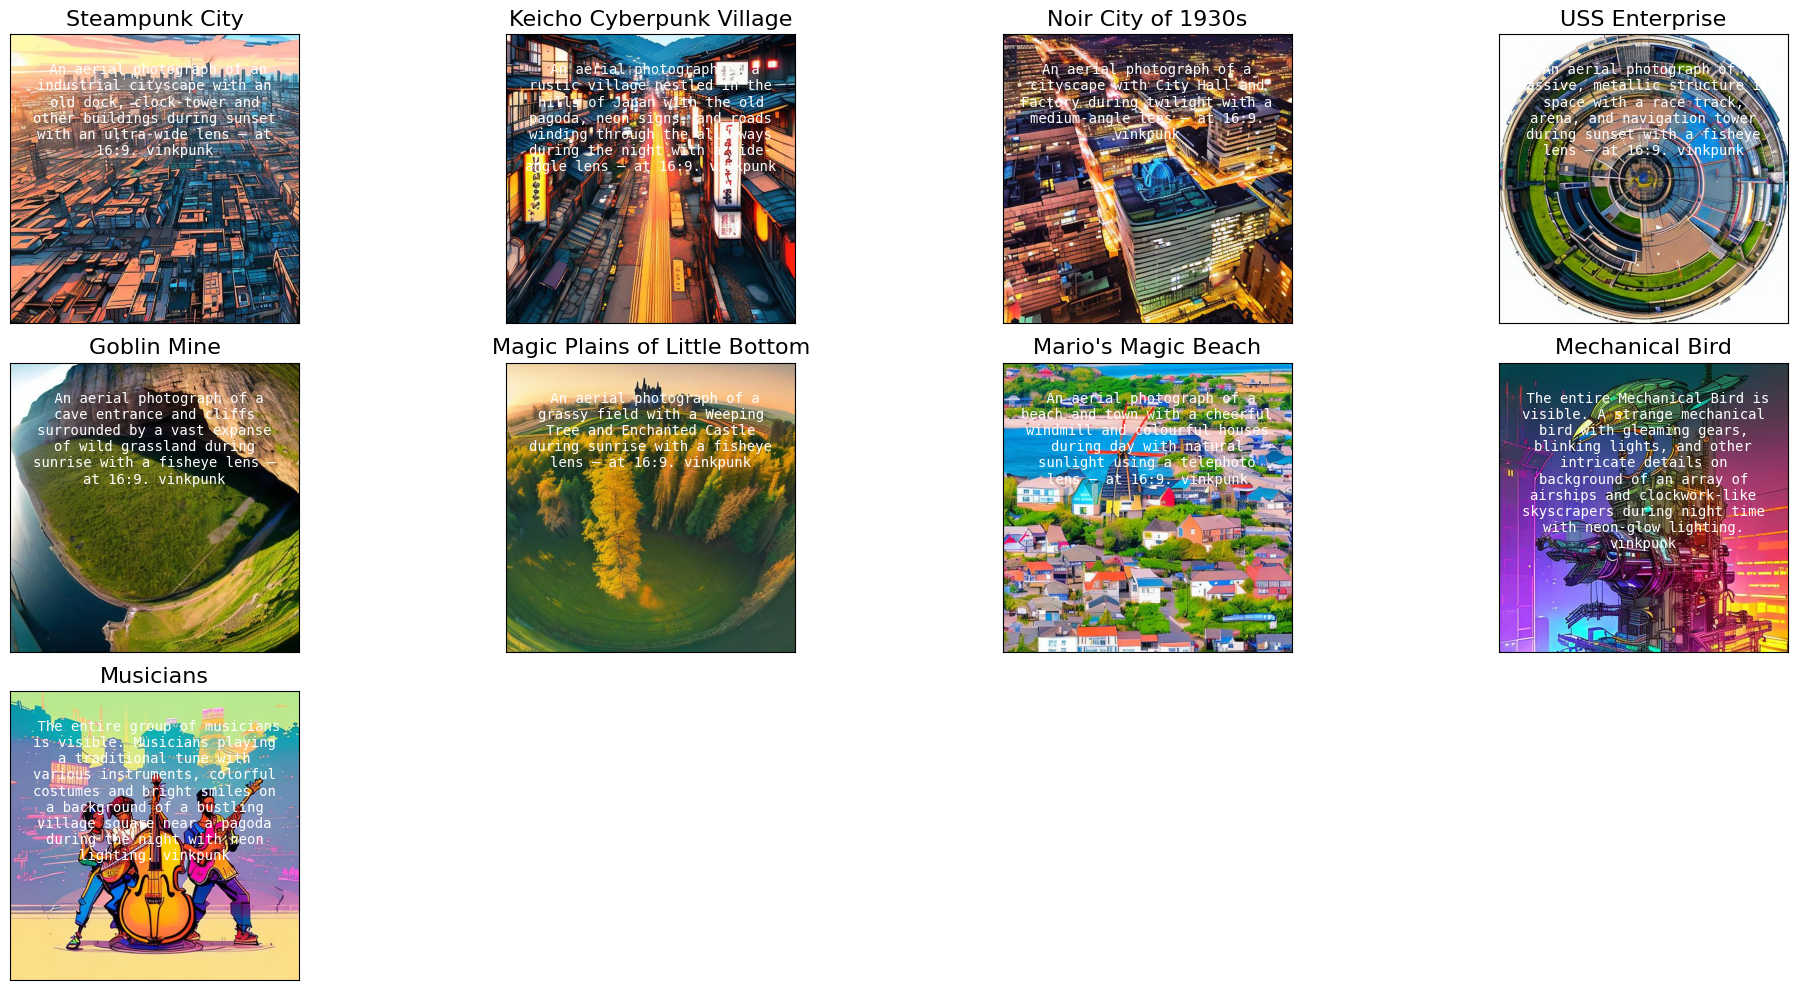

In [15]:
import textwrap
import matplotlib.pyplot as plt
# Set the desired width of the prompt
width = 30
fig = plt.figure(figsize=(20,10))
columns = 4

# Loop over the images and create a subplot for each
for i, (obj, prompt, image_file_name) in enumerate(images):
    image = plt.imread(image_file_name)
    
    # Create a subplot for the image
    ax = fig.add_subplot(len(images) // columns + 1, columns, i + 1)
    
    # Set the title to the obj.name
    ax.set_title(obj.name, fontsize=16)
    
    # Wrap the prompt text to the desired width
    wrapped_prompt = textwrap.fill(prompt, width=width)
    
    # Display the wrapped prompt text below the title
    ax.text(0.5, 0.9, wrapped_prompt, ha='center', va='top', transform=ax.transAxes, fontsize=10, family='monospace', color='white')
    
    # Display the image
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.subplots_adjust(wspace=0.05, hspace=0.3)
plt.tight_layout()

# Remove the half-transparent white overlay
fig.patch.set_facecolor('none')


In [ ]:
import textwrap
import matplotlib.pyplot as plt

# Set the desired width of the prompt
prompt_width = 30

# Set the padding between images
padding = 20

# Create the figure
fig = plt.figure(figsize=(20, 10))

# Define the number of columns
columns = 4

# Loop over the images and create a subplot for each
for i, (obj, prompt, image_file_name) in enumerate(images):
    image = plt.imread(image_file_name)
    
    # Calculate the row and column of the subplot
    row = i // columns
    col = i % columns
    
    # Calculate the subplot position and size
    left = col * (1 / columns) + padding / (2 * fig.get_size_inches()[0])
    bottom = row * (1 / (len(images) // columns + 1)) + padding / (2 * fig.get_size_inches()[1])
    width = (1 - padding / fig.get_size_inches()[0]) / columns
    aspect_ratio = image.shape[0] / image.shape[1]
    height = width * aspect_ratio
    
    # Create a subplot for the image
    ax = fig.add_axes([col * width + padding / 2, row * height + padding / 2, width, height])
    
    # Set the title to the obj.name
    ax.set_title(obj.name, fontsize=16, horizontalalignment='right', verticalalignment='top')
    
    # Wrap the prompt text to the desired width
    wrapped_prompt = textwrap.fill(prompt, width=prompt_width)
    
    # Display the wrapped prompt text below the title
    ax.text(0, 0, wrapped_prompt, ha='left', va='bottom', transform=ax.transAxes, fontsize=10, family='monospace', color='white')
    
    # Display the image
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])

# Remove the half-transparent white overlay
fig.patch.set_facecolor('none')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Tighten the layout
plt.tight_layout()


/tmp/ipykernel_8239/3724174917.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Error in callback <function _draw_all_if_interactive at 0x7fa81dadf400> (for post_execute):


LinAlgError: Singular matrix

LinAlgError: Singular matrix

<Figure size 2000x1000 with 9 Axes>